






# Name : Sayera Hafsa

# GRIP The Graduate Rotational Internship Program from              SPARK Foundation

# Task 2 Data Science and Business Analysis with Python

# Topic  is predict the optimum number of clusters through          k-means clustering algorithm and represent it visually.

In [12]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from kneed import KneeLocator

df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Loaded the data

# Clean the data 

In [13]:
df.drop(["Id"],axis=1,inplace=True)

In [14]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


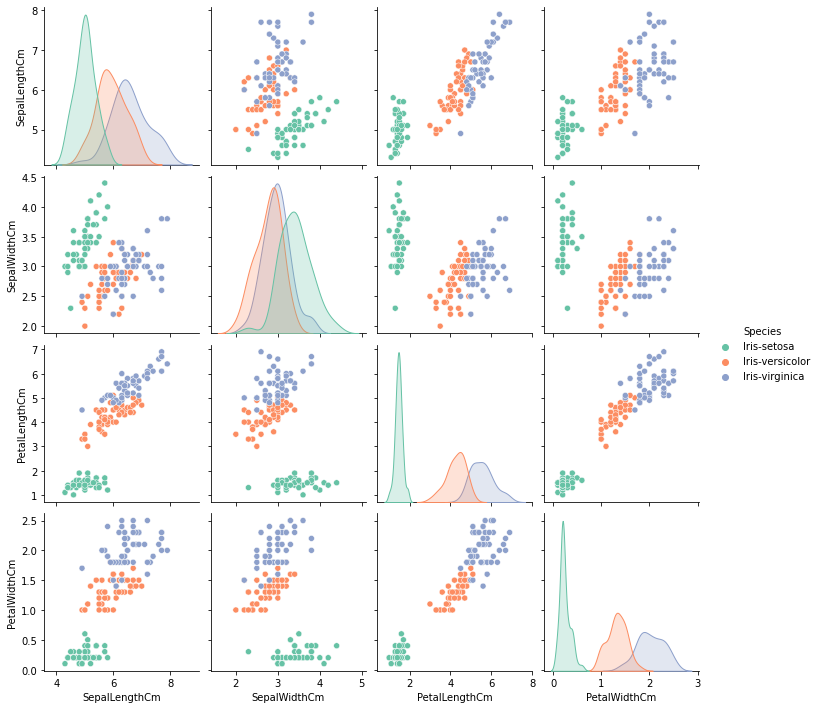

In [15]:

sns.pairplot(data=df,hue="Species",dropna=True,palette="Set2")
plt.show()

## It is quite easy to figure out that Iris-setosa is seperatable from the rest 

In [16]:
# features=df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

# either Take all the rows from the above mentioned 4 columns in double quotes
# or by the following index we took all the values of the rows from columns 1 to 4

x=df.iloc[:,[0,1,2,3]].values

# all values of all rows from column 1st,2nd,3rd and 4th as the index starts from 0

Sum_of_squared_distances=[]
# we will compute the within cluster sum of squares and #appended to our wcss list.


for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++',
                     max_iter=300,  n_init=10,random_state=0 )  
     kmeans.fit(x)
     Sum_of_squared_distances.append(kmeans.inertia_)
     
        
        

In [17]:
#i above is between 1-10 numbers. init parameter is the random #initialization method  
#we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
#enter the default value of 300
#the next parameter is n_init which is the number of times the #K_means algorithm will be run with
#different initial centroid.

In [18]:

#kmeans algorithm fits to the X dataset

# Predicting the number of clusters by using the elbow method

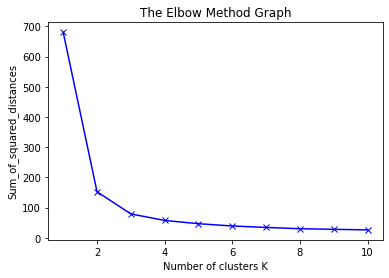

In [19]:
plt.plot(range(1,11),Sum_of_squared_distances, 'bx-')
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters K')
plt.ylabel('Sum_of_squared_distances')
plt.show()

# At times it will be difficult to read the number of clusters from the elbow so here i find the number of clusters from elbow programatically by calling KneeLocator function

In [20]:
 
    kl = KneeLocator( range(1, 11), Sum_of_squared_distances, curve="convex", direction="decreasing")

print(" The Number of Clusters are", kl.elbow)

 The Number of Clusters are 3


# Here we got 3 clusters as the output

##  Now that we know there are 3 clusters let us do it for 3 clusters

In [21]:
kmeans = KMeans(n_clusters=3, init ='k-means++',max_iter=300,  n_init=10,random_state=0 ) 
    
y_kmeans = kmeans.fit_predict(x)
        

# Visualising the clusters

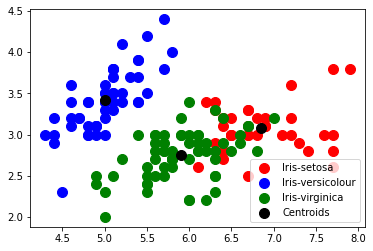

In [22]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            # the The data positions of x and y coordinates on plt scatter
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'Black', label = 'Centroids')

plt.legend()

# The Centroids are shown here with the black dot for the 3 clusters (Groups)